# Import Libraries

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Data Collection 



In [90]:
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [91]:
# drop id
df=df.drop(columns=['id'],axis=1)

In [92]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [94]:
df.shape

(5110, 11)

In [95]:
# missing values -->bmi
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Data Visualization

array([<AxesSubplot:ylabel='stroke'>], dtype=object)

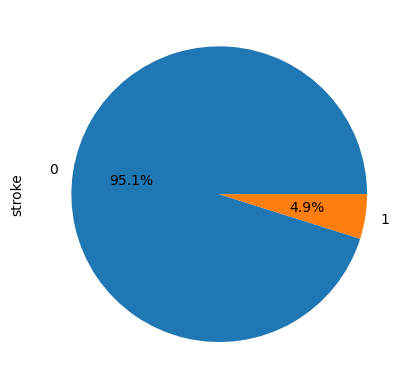

In [96]:
# Stroke  (1--stroke) (0--not)
c=round(df['stroke'].value_counts()/df.shape[0]*100,2)
c.plot.pie(autopct='%1.1f%%',subplots=True)

In [97]:
# gender 
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

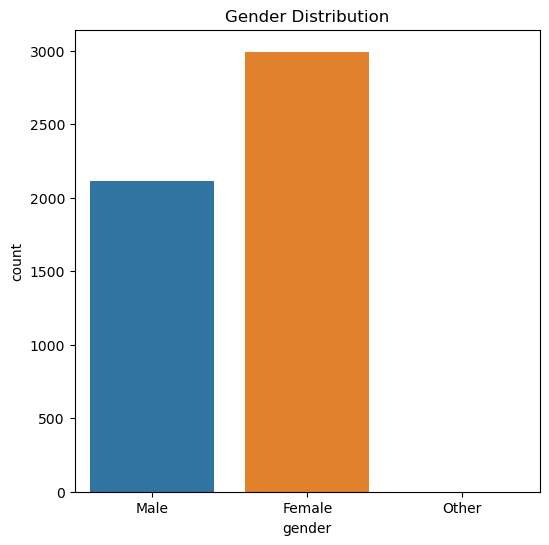

In [98]:
# Gender column 
plt.figure(figsize=(6,6))
sns.countplot(x='gender',data=df)
plt.title('Gender Distribution')
plt.show()

array([<AxesSubplot:ylabel='hypertension'>], dtype=object)

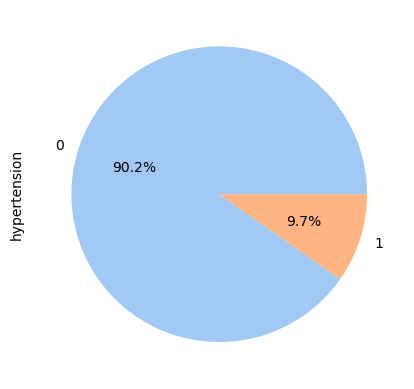

In [99]:
# hypertension
c=round(df['hypertension'].value_counts()/df.shape[0]*100,2)
colors = sns.color_palette('pastel')[0:5]
c.plot.pie(autopct='%1.1f%%',subplots=True,colors=colors)

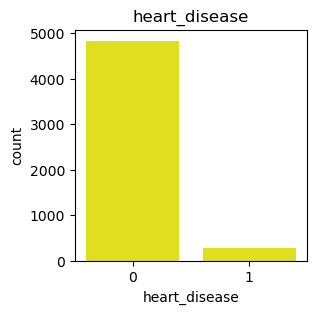

In [100]:
# heart_disease column 
plt.figure(figsize=(3,3))
sns.countplot(x='heart_disease',data=df,color='Yellow')
plt.title('heart_disease')
plt.show()

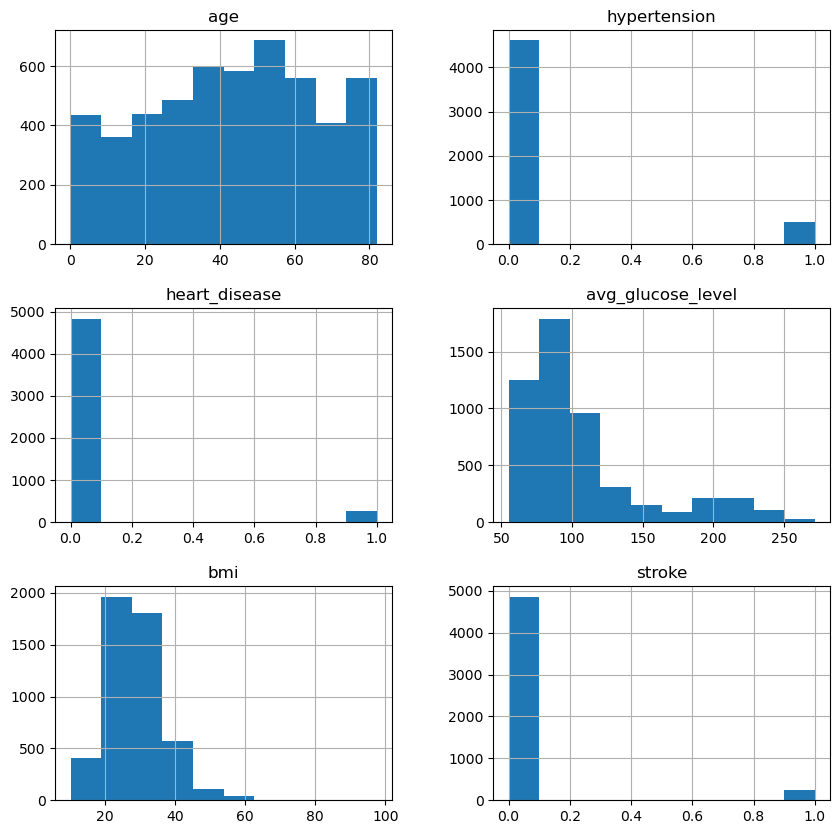

In [101]:
# diffrent value in features ( age , ave_glocose,bmi)
# label value in feature (heart disease ,hypertension ,storke)
df.hist(bins=10, figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

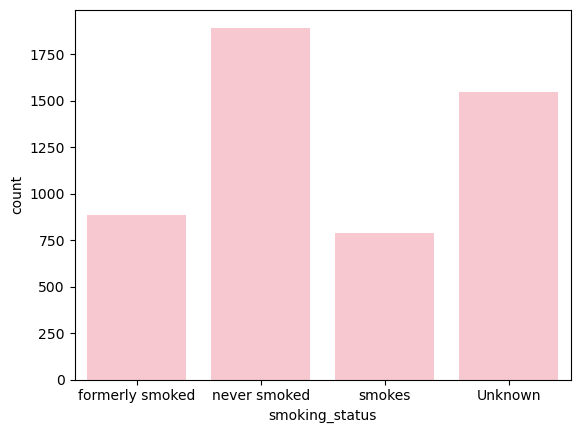

In [102]:
sns.countplot(x='smoking_status',data=df,color='pink')

array([<AxesSubplot:ylabel='ever_married'>], dtype=object)

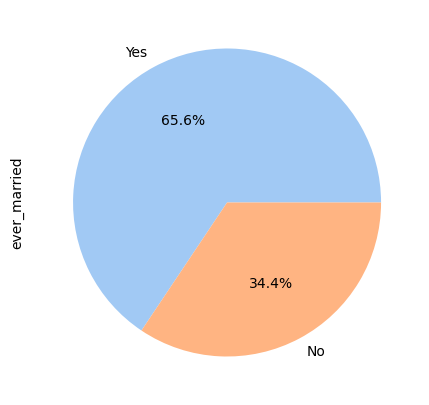

In [103]:
# married
plt.figure(figsize=(5,5))
c=round(df['ever_married'].value_counts()/df.shape[0]*100,2)
colors = sns.color_palette('pastel')[0:6]
c.plot.pie(autopct='%1.1f%%',subplots=True,colors=colors)

<AxesSubplot:xlabel='work_type', ylabel='count'>

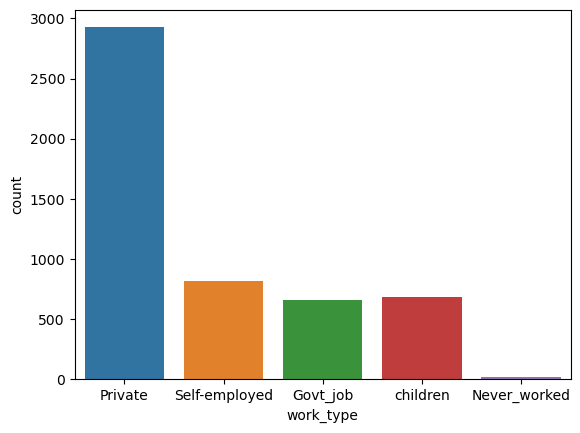

In [104]:
# work_type
sns.countplot(x='work_type',data=df)

array([<AxesSubplot:ylabel='Residence_type'>], dtype=object)

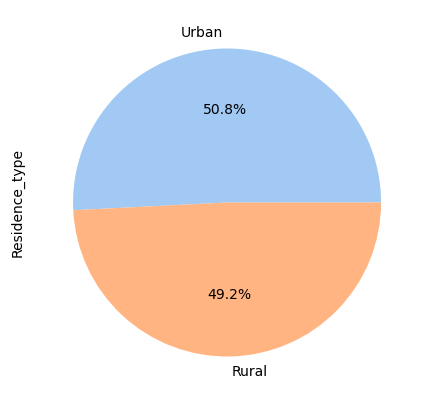

In [105]:
#Residence_type
plt.figure(figsize=(5,5))
c=round(df['Residence_type'].value_counts()/df.shape[0]*100,2)
colors = sns.color_palette('pastel')[0:6]
c.plot.pie(autopct='%1.1f%%',subplots=True,colors=colors)

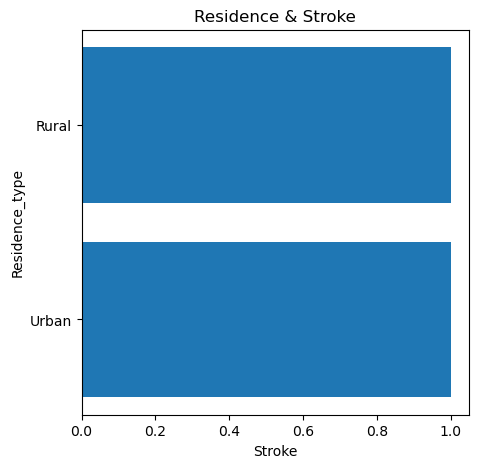

In [106]:
# Residence type almost the same proportion with Stroke 
plt.figure(figsize=(5,5))
plt.barh(df['Residence_type'], df['stroke'])
plt.ylabel("Residence_type")
plt.xlabel("Stroke")
plt.title("Residence & Stroke")
plt.show()

# Data Pre_processing

In [107]:
# No Duplicated Values
df.duplicated().sum()


0

In [108]:
# missing value > bmi
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [109]:
df.dropna(inplace=True)

**OnHotEncoder**

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,4,5,6,9])],remainder='passthrough')

**Standard Scaler**

In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()